# Statistics Continued

friend_counts = Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})


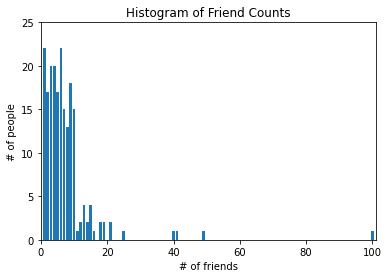

number of users = 204
largest_value = 100
smallest_value = 1
sorted_values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49, 100]
smallest_value = 1
second_smallest_value = 1
second_largest_value = 49
mean number of friends = 7.333333333333333
5
5.5
median number of friends = 6.0
1
3
6
9
13
mode number of friends = [6, 1]
99
*********** Ignore any output below. They are from our work last week **

In [1]:
# import everything from our work on Tuesday
from Week03T import *

## Correlation

The VP of Growth at your social network start-up has a theory that the amount of time people spend on the site is related to the number of friends they have on the site, and she’s asked you to verify this.

After digging through traffic logs, you’ve come up with a list called `daily_minutes` that shows how many minutes per day each user spends on the social network, and you’ve ordered it so that its elements correspond to the elements of our previous `num_friends` list. We’d like to investigate the relationship between these two metrics.

In [2]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,
                 27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,
                 26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,
                 24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,
                 25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,
                 14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,
                 13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,
                 28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,
                 25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,
                 20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,
                 24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

We’ll first look at *covariance*, the paired analogue of variance. Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means:

In [3]:
from Week02TR import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    # Note that variance can be considered as a special case of covariance of a variable with itself
    # variance = sum_of_squares (de_mean(xs)) / (len(xs) - 1)
    # variance = dot (de_mean(xs), de_mean(xs)) / (len(xs) - 1)
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [5]:
print(f"var of daily_minutes = {variance(daily_minutes)}")
print(f"cov of daily_minutes with itself = {covariance(daily_minutes, daily_minutes)}")

print(f"cov b/w num_friends and daily_minutes = {covariance(num_friends, daily_minutes)}")
print(f"cov b/w num_friends and daily_hours   = {covariance(num_friends, daily_hours)}")

var of daily_minutes = 100.78589895440929
cov of daily_minutes with itself = 100.78589895440929
cov b/w num_friends and daily_minutes = 22.425435139573064
cov b/w num_friends and daily_hours   = 0.37375725232621776


Recall that `dot` sums up the products of corresponding pairs of elements.

When corresponding elements of `x` and `y` are either both above their means or both below their means, a positive number enters the sum.

When one is above its mean and the other below, a negative number enters the sum.

Accordingly, a “large” positive covariance means that `x` tends to be large when `y` is large and small when `y` is small.

A “large” negative covariance means the opposite—that `x` tends to be small when `y` is large and vice versa.

A covariance close to zero means that no such relationship exists.

Nonetheless, this number can be hard to interpret, for a couple of reasons:

- Its units are the product of the inputs’ units (e.g., friend-minutes-per-day), which can be hard to make sense of. (What’s a “friend-minute-per-day”?)
- If each user had twice as many friends (but the same number of minutes), the covariance would be twice as large. But in a sense, the variables would be just as interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

For this reason, it’s more common to look at the *correlation*, which divides out the standard deviations of both variables:

In [6]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0    # if no variation, correlation is zero

In [7]:
print(f"cor b/w num_friends and daily_minutes = {correlation(num_friends, daily_minutes)}")
print(f"cor b/w num_friends and daily_hours   = {correlation(num_friends, daily_hours)}")

print(f"cor of daily_minutes with itself = {correlation(daily_minutes, daily_minutes)}")
neg_daily_minutes = [-1 * m for m in daily_minutes]
print(f"cor of daily_minutes with -daily_minutes = {correlation(daily_minutes, neg_daily_minutes)}")

cor b/w num_friends and daily_minutes = 0.24736957366478216
cor b/w num_friends and daily_hours   = 0.247369573664782
cor of daily_minutes with itself = 1.0000000000000002
cor of daily_minutes with -daily_minutes = -1.0000000000000002


The correlation is unitless and always lies between –1 (perfect anticorrelation) and 1 (perfect correlation). A number like 0.25 represents a relatively weak positive correlation.

However, one thing we neglected to do was examine our data.

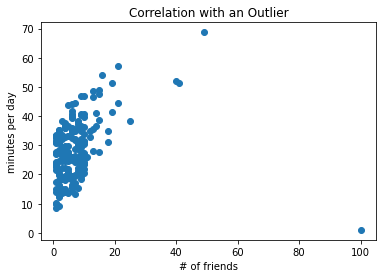

In [8]:
plt.scatter(num_friends, daily_minutes)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

The person with 100 friends (who spends only 1 minute per day on the site) is a huge outlier, and correlation can be very sensitive to outliers. What happens if we ignore him?

In [9]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

print(f"cor b/w num_friends_good and daily_minutes_good = {correlation(num_friends_good, daily_minutes_good)}")
print(f"cor b/w num_friends_good and daily_hours_good   = {correlation(num_friends_good, daily_hours_good)}")

cor b/w num_friends_good and daily_minutes_good = 0.5736792115665573
cor b/w num_friends_good and daily_hours_good   = 0.5736792115665579


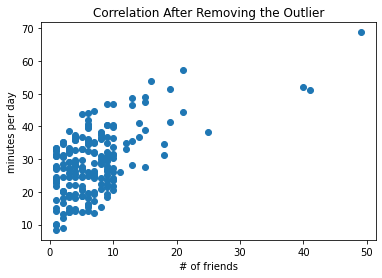

In [10]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation After Removing the Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

In [11]:
iqr = interquartile_range (num_friends_good)
mean_num_friends = mean(num_friends_good)
print(mean_num_friends)
print(mean_num_friends + 1.5 * iqr)

6.876847290640394
15.876847290640395


You investigate further and discover that the outlier was actually an internal test account that no one ever bothered to remove. So you feel justified in excluding it.

## Simpson’s Paradox

One not uncommon surprise when analyzing data is *Simpson’s paradox*, in which correlations can be misleading when *confounding* variables are ignored.

For example, imagine that you can identify all of your members as either East Coast data scientists or West Coast data scientists. You decide to examine which coast’s data scientists are friendlier:

| Coast       | # of members | Avg. # of friends |
| ----------- | ------------ | ----------------- |
| West Coast  | 101          | 8.2               |
| East Coast  | 103          | 6.5               |

It certainly looks like the West Coast data scientists are friendlier than the East Coast data scientists.

But when playing with the data, you discover something very strange. If you look only at people with PhDs, the East Coast data scientists have more friends on average. And if you look only at people without PhDs, the East Coast data scientists also have
more friends on average!

| Coast       | Degree | # of members | Avg. # of friends |
| ----------- | ------ | ------------ | ----------------- |
| West Coast  | PhD    | 35           | 3.1               |
| East Coast  | PhD    | 70           | 3.2               |
| West Coast  | No PhD | 66           | 10.9              |
| East Coast  | No PhD | 33           | 13.4              |

First note that the averages agree with those from the previous table:

In [13]:
# round the numbers to 1 decimal place
print(f"West Coast avg # of friends = {round((35 * 3.1 + 66 * 10.9) / 101, 1)}")
print(f"West Coast avg # of friends = {round((70 * 3.2 + 33 * 13.4) / 103, 1)}")

West Coast avg # of friends = 8.2
West Coast avg # of friends = 6.5


Once you account for the users’ degrees, the correlation goes in the opposite direction!

Bucketing the data as East Coast/West Coast disguised the fact that the East Coast data scientists skew much more heavily toward PhD types.

The only real way to avoid this is by *knowing your data* and by doing what you can to make sure you’ve checked for possible confounding factors. Obviously, this is not always possible. If you didn’t have data on the educational attainment of these 200
data scientists, you might simply conclude that there was something inherently more sociable about the West Coast.

## Some Other Correlational Caveats

A correlation of zero indicates that there is no **linear** relationship between the two variables.

However, there may be other sorts of relationships. For example, if:

In [14]:
x = [-2, -1, 0, 1, 2]
y = [ 2,  1, 0, 1, 2]

then `x` and `y` have zero correlation:

In [15]:
print(f"corr b/w x and y = {correlation(x, y)}")

corr b/w x and y = 0.0


Obviously `x` and `y` have a relationship—each element of `y` equals the absolute value of the corresponding element of `x`.

Let's take a look at another example in which `x` and `y` have a quadratic relationship:

In [16]:
y = [e**2 for e in x]
print(f"y = {y}")
print(f"corr b/w x and y = {correlation(x, y)}")

y = [4, 1, 0, 1, 4]
corr b/w x and y = 0.0


In addition, correlation tells you nothing about how large the relationship is. The following variables are perfectly correlated:

In [17]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

print(f"corr b/w x and y = {correlation(x, y)}")

corr b/w x and y = 1.0


but depending on what you’re measuring, it’s quite possible that this relationship isn’t all that interesting.

## Correlation and Causation

You may have heard at some point that "correlation is not causation", or "correlation does not imply causation". This is an important point to remember.

If *x* and *y* are strongly correlated, that might mean that *x* causes *y*, that *y* causes *x*, that each causes the other, that some third factor causes both, or nothing at all.

Consider the relationship between `num_friends` and `daily_minutes`.
- It’s possible that having more friends on the site causes  users to spend more time on the site. This might be the case if each friend posts a certain amount of content each day, which means that the more friends you have, the more time it takes to stay current with their updates.
- However, it’s also possible that the more time users spend chatting/exploring/arguing on the social network, the more they encounter and befriend like-minded people. That is, spending more time on the site causes users to have more friends.
- A third possibility is that the users who are most passionate about data science spend more time on the site (because they find it more interesting) and more actively collect data science friends (because they don’t want to associate with anyone else).

One way to feel more confident about causality is by conducting randomized trials. If you can randomly split your users into two groups with similar demographics and give one of the groups a slightly different experience, then you can often feel pretty
good that the different experiences are causing the different outcomes.